# Students Performance in Exams

**Content**

This data set consists of the marks secured by the students in various subjects.

**Inspiration**

To understand the influence of the parents background, test preparation etc on students performance

## 1. Problem Statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity,
Parental level of education, Lunch and Test preparation course.

## 2. Data Collection

Dataset source: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

## 2. EDA

In [1]:
# Import reqired libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Checks

In [4]:
# Check for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

In [5]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.

In [6]:
# Print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Check for unique values for each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
# Check for the dataset stats
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


`Insights`
- All three scores have 1000 values --> no missing data in math_score, reading_score, or writing_score (good for modeling).
- Central tendency is similar: means ~66–69 and medians ~66–70 --> distributions are fairly symmetric and on the same 0–100 scale, so combining them (e.g., total/average score) is reasonable.
- Spread is similar too (std ≈ 15 for all) --> no single subject is wildly more variable.
- Math has a minimum of 0 while reading/writing mins are 17 and 10.
- 50% of students fall roughly between ~57 and ~79 in all subjects

### Explore Data

In [9]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [12]:
# See how many categories are there in each categorical variable
categorical_features = df.select_dtypes(include='object').columns
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} categories - {df[col].unique()}")

gender: 2 categories - ['female' 'male']
race_ethnicity: 5 categories - ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: 6 categories - ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: 2 categories - ['standard' 'free/reduced']
test_preparation_course: 2 categories - ['none' 'completed']


In [14]:
# Define numerical and categorical futures
numerical_features = df.select_dtypes(include=['int', 'float']).columns.to_list()
categorical_features = df.select_dtypes(include='object').columns.to_list()
print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Feature engineering

In [16]:
# Adding columns for total score and average score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average-score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


### Visualization

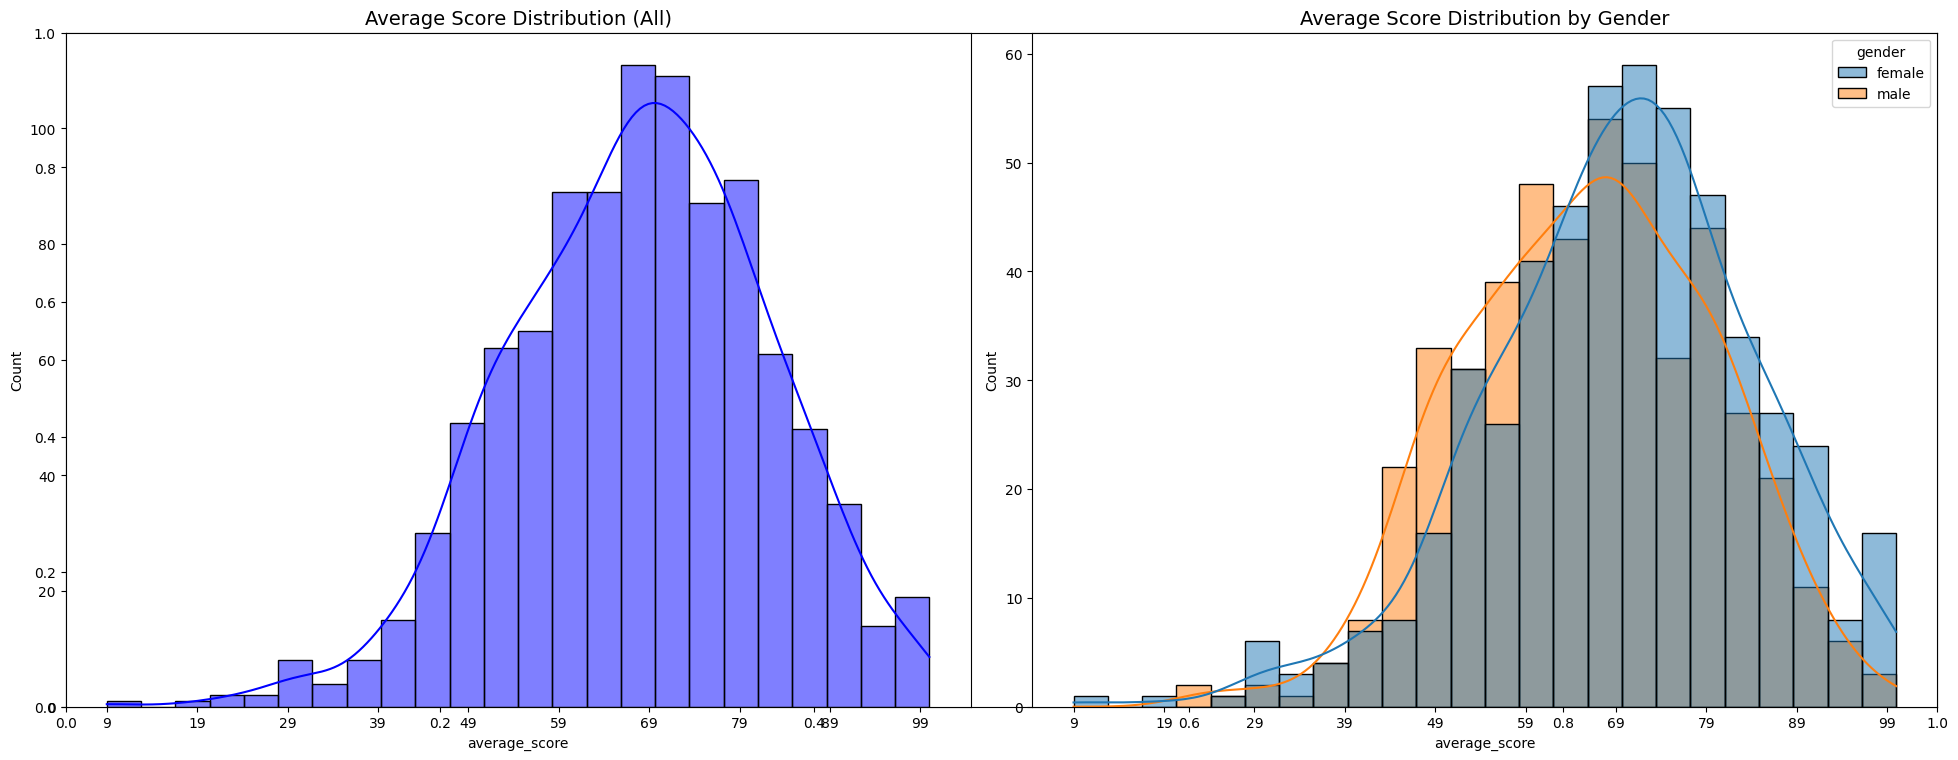

In [27]:
# Check the average scores distribution
fig, ax = plt.subplots(figsize=(20, 8))
plt.subplot(121)
sns.histplot(
    df,
    x='average_score',
    kde=True,
    color='blue'
)
plt.title('Average Score Distribution (All)', fontsize=14)
plt.xticks(np.arange(df['average_score'].min(),
                     df['average_score'].max() + 1,
                     10))

plt.subplot(122)
sns.histplot(
    df,
    x='average_score',
    kde=True,
    hue='gender'
)
plt.title('Average Score Distribution by Gender', fontsize=14)
plt.xticks(np.arange(df['average_score'].min(),
                     df['average_score'].max() + 1,
                     10))

plt.tight_layout()
plt.show()

`Insights`
- The overall average score is roughly bell-shaped and centered around the low 70s, suggesting a near-normal distribution with most students scoring between about 50 and 90.
- Both genders follow a similar distribution, though females show a slightly higher concentration of scores in the upper range compared to males.